<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/main/Data/ad_click_dataset.csv")

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [22]:
train_set.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [23]:
train_set = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [24]:
test_set = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [25]:
X_train = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_train = train_set['click']

In [26]:
X_test = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_test = test_set['click']

Work on the stuff below

In [27]:
num_attributes = X_train.select_dtypes( include = ['float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [28]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [29]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=5))])

In [30]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.6675  , 0.66125 , 0.658125, 0.656875, 0.6575  ])

In [31]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [32]:
predictions = pipeline.predict( X_test )

In [33]:
cm = confusion_matrix(y_test, predictions)

In [34]:
cm

array([[  92,  590],
       [  74, 1244]])

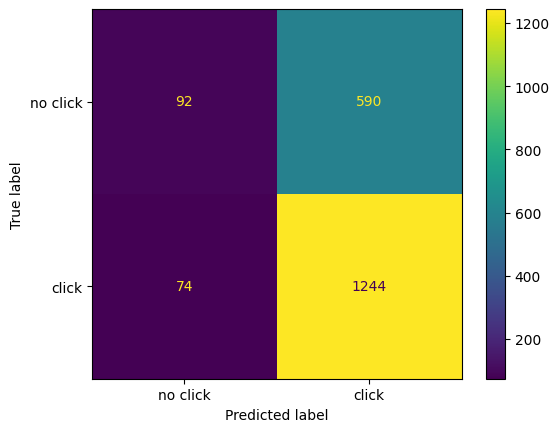

In [35]:
ConfusionMatrixDisplay(cm, display_labels=["no click", "click"]).plot()

In [42]:
metrics.recall_score(y_test, predictions)

0.9438543247344461

In [43]:
metrics.precision_score(y_test, predictions)

0.678298800436205

In [44]:
metrics.f1_score(y_test, predictions)

0.7893401015228426

In [45]:
metrics.accuracy_score(y_test, predictions)

0.668